<a href="https://colab.research.google.com/github/Lijovj/Data-Analysis-Project/blob/main/covid_19_world_vaccination_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('covid-19-world-vaccination-progress')
jovian.set_colab_id('1yBOisBnAUktJ-uMp8tDXt8C4cFiTW5W-')

     |████████████████████████████████| 68 kB 3.1 MB/s 


# COVID-19 World Vaccination Progress Analysis

Talk about the dataset (source, what it contains, how it will be useful)
    - Kaggle
    - Information about COVID-19 World Vaccination

In [3]:
pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od
download_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lijovj
Your Kaggle Key: ··········


100%|██████████| 804k/804k [00:00<00:00, 86.7MB/s]

## Download the Data

In [5]:
data_filename = '/content/covid-world-vaccination-progress/country_vaccinations.csv'

## Data preparation & Cleaning
 1 Load the file using pandas
 2 Look at some information about the file & columns
 3 Fix any missing or incorrect values

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(data_filename)

In [8]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [9]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
34617,Zimbabwe,ZWE,2021-07-28,2275416.0,1562285.0,713131.0,58581.0,46563.0,15.31,10.51,4.80,3133.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1421965934...
34618,Zimbabwe,ZWE,2021-07-29,2324034.0,1593656.0,730378.0,48618.0,43848.0,15.64,10.72,4.91,2950.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1421965934...
34619,Zimbabwe,ZWE,2021-07-30,2375361.0,1623874.0,751487.0,51327.0,43329.0,15.98,10.93,5.06,2915.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1421965934...
34620,Zimbabwe,ZWE,2021-07-31,2413509.0,1645599.0,767910.0,38148.0,42406.0,16.24,11.07,5.17,2853.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1421965934...
34621,Zimbabwe,ZWE,2021-08-01,2433341.0,1654112.0,779229.0,19832.0,43706.0,16.37,11.13,5.24,2941.0,"Sinopharm/Beijing, Sinovac, Sputnik V",Ministry of Health,https://twitter.com/MoHCCZim/status/1421965934...


In [10]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34622 entries, 0 to 34621
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              34622 non-null  object 
 1   iso_code                             34622 non-null  object 
 2   date                                 34622 non-null  object 
 3   total_vaccinations                   19287 non-null  float64
 4   people_vaccinated                    18404 non-null  float64
 5   people_fully_vaccinated              15570 non-null  float64
 6   daily_vaccinations_raw               15913 non-null  float64
 7   daily_vaccinations                   34366 non-null  float64
 8   total_vaccinations_per_hundred       19287 non-null  float64
 9   people_vaccinated_per_hundred        18404 non-null  float64
 10  people_fully_vaccinated_per_hundred  15570 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df.describe()

In [13]:
df.shape

(34622, 15)

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df= df.select_dtypes(include=numerics)
len(numeric_df.columns) # only 9 columns have nuremic data out of 15 columns
numeric_df.columns

Index(['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

Percentage of missing values per column

In [15]:
msng_percent = df.isna().sum().sort_values(ascending=False) / len(df)
msng_percent

people_fully_vaccinated_per_hundred    0.550286
people_fully_vaccinated                0.550286
daily_vaccinations_raw                 0.540379
people_vaccinated_per_hundred          0.468430
people_vaccinated                      0.468430
total_vaccinations_per_hundred         0.442926
total_vaccinations                     0.442926
daily_vaccinations_per_million         0.007394
daily_vaccinations                     0.007394
source_website                         0.000000
source_name                            0.000000
vaccines                               0.000000
date                                   0.000000
iso_code                               0.000000
country                                0.000000
dtype: float64

In [16]:
msng_percent[msng_percent != 0]

people_fully_vaccinated_per_hundred    0.550286
people_fully_vaccinated                0.550286
daily_vaccinations_raw                 0.540379
people_vaccinated_per_hundred          0.468430
people_vaccinated                      0.468430
total_vaccinations_per_hundred         0.442926
total_vaccinations                     0.442926
daily_vaccinations_per_million         0.007394
daily_vaccinations                     0.007394
dtype: float64

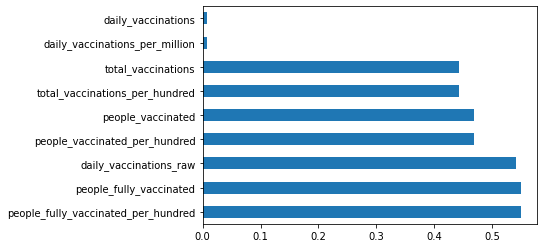

In [17]:
msng_percent[msng_percent != 0].plot(kind='barh')

Remove columns thats you don't want to use

In [19]:
df.dropna(inplace=True)
#df.isnull().sum()  #To finf sum of all null value columns

In [20]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [21]:
df.country.value_counts()

Scotland        231
Germany         215
Switzerland     213
Belgium         213
England         211
               ... 
Cape Verde        1
Senegal           1
Sierra Leone      1
Andorra           1
Rwanda            1
Name: country, Length: 149, dtype: int64

## Analysis & Visualization

In [23]:
df.start_date = df.date.min()
df.end_date = df.date.max()

In [24]:
df.start_date #vaccination record start date

'2020-12-11'

In [25]:
df.end_date # #vaccination record available till below date

'2021-08-01'

In [102]:
df.vaccines.unique()

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Abdala

In [27]:
len(df.vaccines.unique())

53

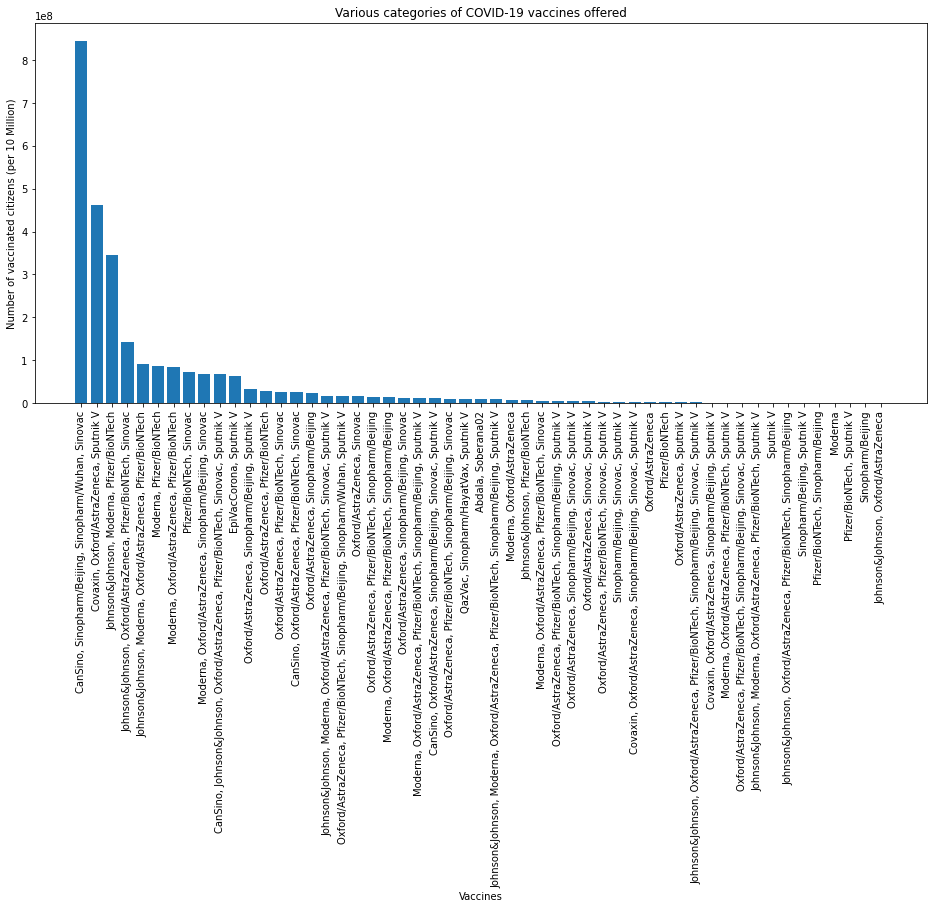

In [103]:
plt.figure(figsize=(16,7))
grp = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_no = df[grp].groupby('vaccines').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])


plt.bar(vacc_no.index, vacc_no.total_vaccinations)

plt.title('Various categories of COVID-19 vaccines offered')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Vaccines')
plt.show();

In [85]:
vaccinations_per_country = df.groupby('country')['daily_vaccinations'].sum()
vaccinations_per_country

country
Afghanistan               11772.0
Albania                  340882.0
Andorra                     573.0
Antigua and Barbuda        3798.0
Argentina              30615940.0
                          ...    
Uruguay                 4298678.0
Vietnam                 4360171.0
Wales                   4229207.0
Zambia                   234007.0
Zimbabwe                2240776.0
Name: daily_vaccinations, Length: 149, dtype: float64

In [93]:
vaccinations_per_country = df.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False).head(20)
vaccinations_per_country.head(20)

country
United States     3.841071e+10
India             2.760827e+10
United Kingdom    9.177180e+09
England           7.597323e+09
Brazil            7.212971e+09
Germany           6.810597e+09
France            5.011559e+09
Turkey            4.983146e+09
Italy             4.920406e+09
Russia            3.950996e+09
Mexico            3.764694e+09
Japan             3.595986e+09
Indonesia         3.391981e+09
Canada            3.347565e+09
Chile             2.551978e+09
Spain             2.215137e+09
Poland            1.996894e+09
Argentina         1.931611e+09
Israel            1.863223e+09
South Korea       1.341227e+09
Name: total_vaccinations, dtype: float64

In [ ]:
df.info()

Countries which has highest number of vaccinated people

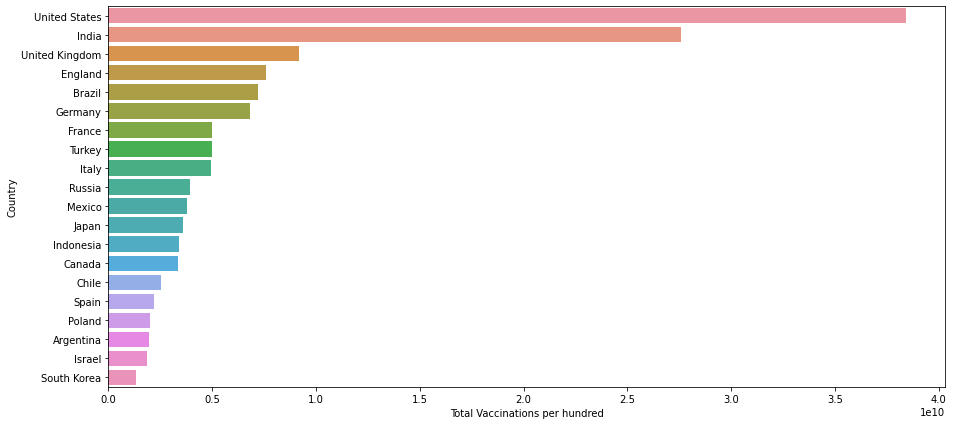

In [94]:
plt.figure(figsize=(15, 7))
sns.barplot(x=vaccinations_per_country.values, y=vaccinations_per_country.index)
plt.xlabel("Total Vaccinations per hundred")
plt.ylabel('Country')
plt.show()

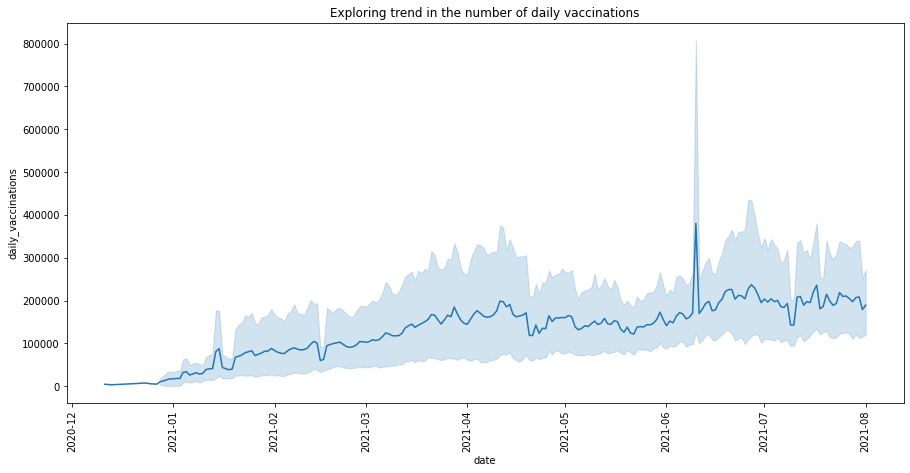

In [34]:
plt.figure(figsize= (15,7))
sns.lineplot(x= "date",y= "daily_vaccinations",data= df)
plt.title("Exploring trend in the number of daily vaccinations")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.date.value_counts()

In [ ]:
df.date = pd.to_datetime(df['date']).dt.to_period('M')
df.date

## Ask & Answer Questions

1. When the vaccination started
2. Which are the most vaccinated countries
3. Which vaccine is popularly used to vaccinate the people

## Summary & Conclusions
- This is the data collected for 148 countries
- As per available data, start date of vaccination is 11-Dec-2020
- End date is 01-Aug-2021, when recorded.
- United States is the most vaccinated country
